In [1]:
path = "output/German1/"
bg_store_img_metadata = {'path':"./data/german_1/storePlan_fix.jpg",'image_crop':[0, 45.6, 0, 26.7], "x_lim": (-1, 44.56), "y_lim" : (26.40, -1) }

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
import seaborn as sns
from datetime import date

np.random.seed(2023)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["animation.embed_limit"] = 500

In [153]:
df = pd.read_csv(f"{path}/tajectories_0.5mins.csv", sep=';')
df.time = pd.to_datetime(df.time)

In [ ]:
df.reset_index()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781547 entries, 0 to 1781546
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   tag_id       object        
 1   time         datetime64[ns]
 2   x            float64       
 3   y            float64       
 4   description  object        
 5   traj_id      int64         
 6   velocity     object        
 7   type         object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 108.7+ MB


In [5]:
df.head()

,tag_id,time,x,y,description,traj_id,velocity,type
0,0x002060000F45,2019-08-01 08:00:00,8.56,10.44,Cart,1,"(0, 0)",start
1,0x002060000F45,2019-08-01 08:00:02,6.46,10.57,Cart,1,"(-1.0500000000000003, 0.06500000000000039)",intermediate
2,0x002060000F45,2019-08-01 08:00:03,5.79,10.56,Cart,1,"(-0.6699999999999999, -0.009999999999999787)",intermediate
3,0x002060000F45,2019-08-01 08:00:05,3.94,10.53,Cart,1,"(-0.925, -0.015000000000000568)",intermediate
4,0x002060000F45,2019-08-01 08:00:07,2.64,10.30,Cart,1,"(-0.6499999999999999, -0.11499999999999932)",intermediate


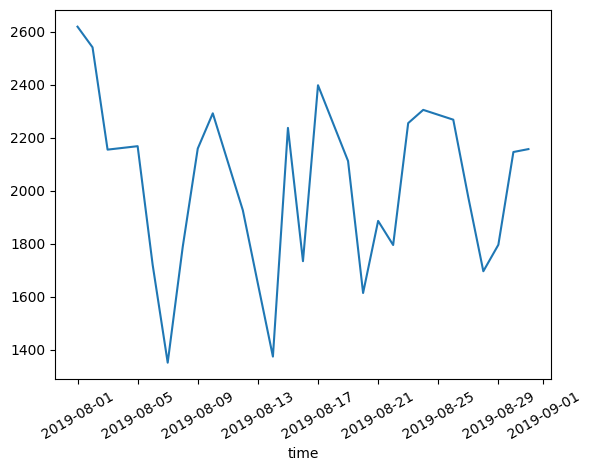

In [6]:
data_traj_date = df.groupby(by=[df.time.dt.date])["traj_id"].nunique()
ax = sns.lineplot(x = data_traj_date.keys(), y = data_traj_date.values)
ax.tick_params(axis='x', rotation=30)

In [7]:
def putBgStoreImage(ax, plotFunc = None):
    bg_img = mpimg.imread(bg_store_img_metadata["path"])
    
    ax.xaxis.tick_top()

    ax.imshow(bg_img, extent=bg_store_img_metadata["image_crop"], origin="lower", aspect="equal")

    ax.set_xlim(bg_store_img_metadata["x_lim"])
    ax.set_ylim(bg_store_img_metadata["y_lim"])

In [8]:
def getTrajectory(traj_data):
    traj_data = traj_data.sort_values(by="time")
    
    fig,ax = plt.subplots(figsize=(12,6))
    putBgStoreImage(ax)
    
    start = traj_data.iloc[0]
    end = traj_data.iloc[-1]
    
    ax.plot(traj_data['x'], traj_data['y']) 

    circle_start = plt.Circle((start["x"],start["y"]), 0.5, color="green")
    circle_end = plt.Circle((end["x"],end["y"]), 0.5, color="yellow")
    
    ax.add_patch(circle_start)
    ax.add_patch(circle_end)
    
    ax.set_title(f'Trajectory for tag {traj_data.tag_id.iloc[0]} on {traj_data["time"].iloc(0)[0].date()}')
    plt.show()

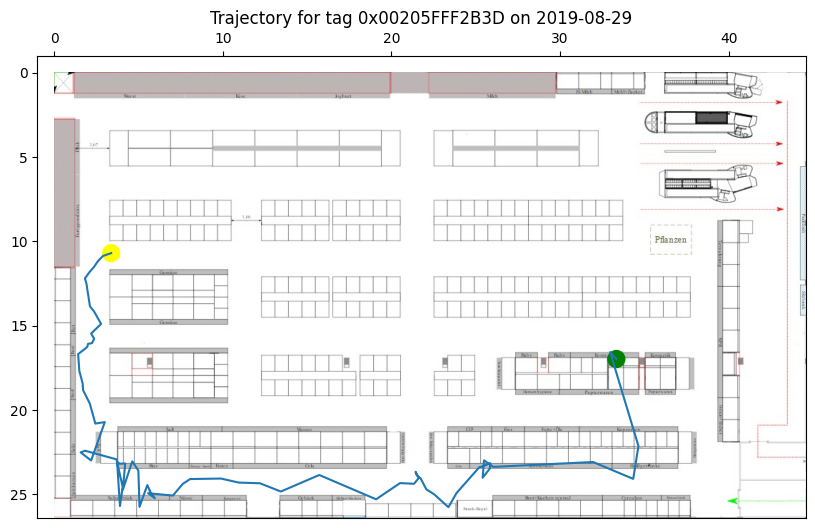

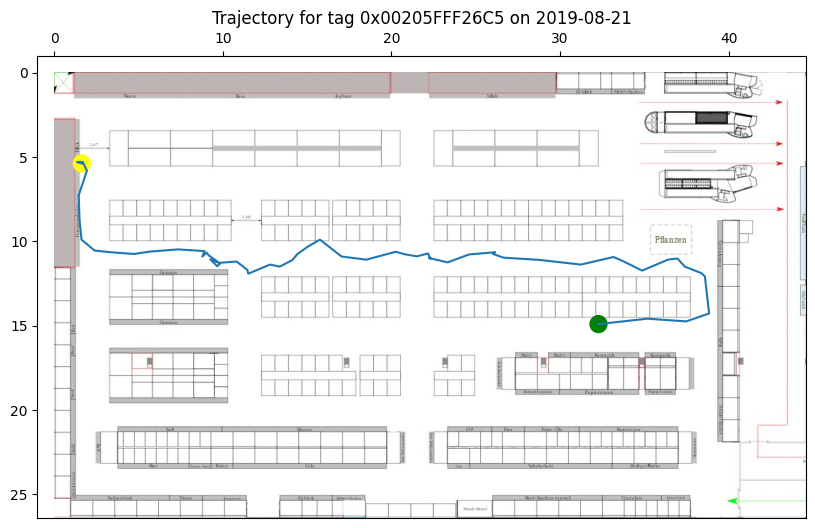

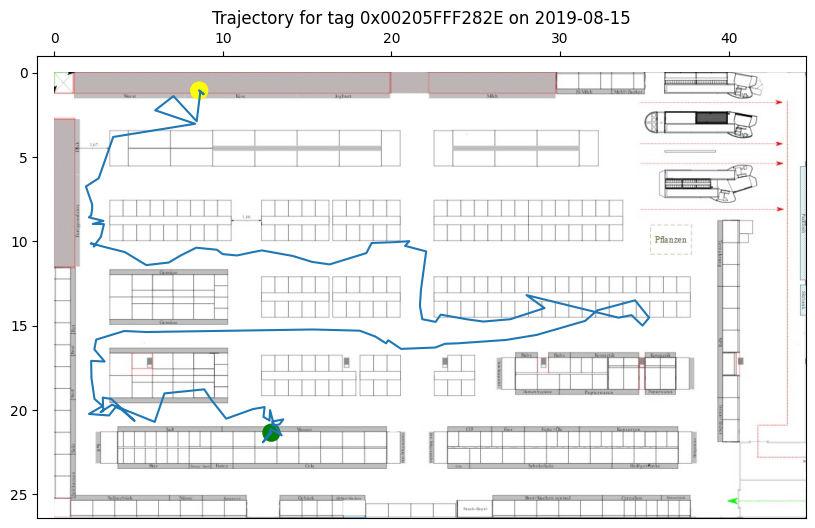

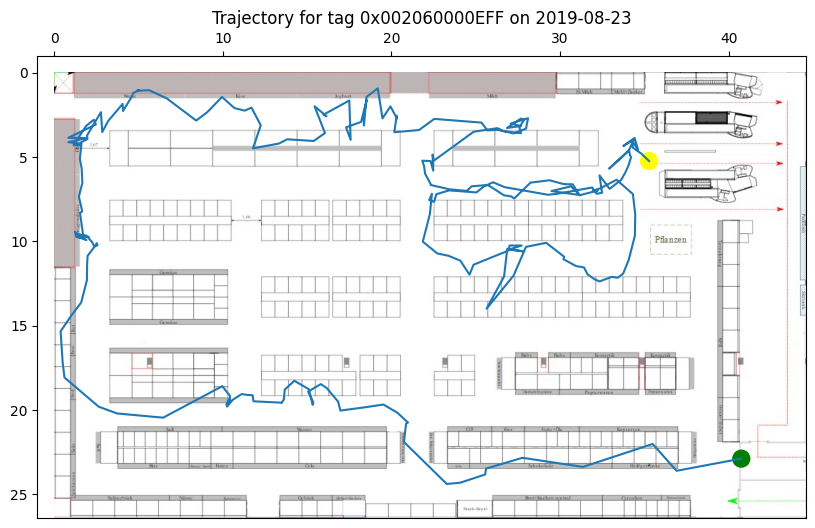

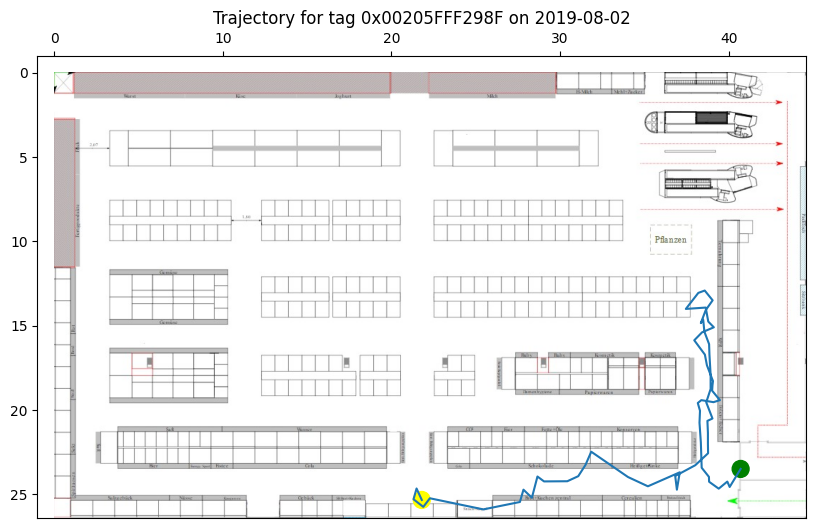

In [9]:
traj_ids = np.random.choice(df.traj_id,5)

for traj_id in traj_ids:
    getTrajectory(df[df.traj_id == traj_id ])

In [10]:
def trajectoryAnimation(traj_data):
    traj_data = traj_data.sort_values(by="time")
    
    fig, ax = plt.subplots(figsize=(12,6))
    putBgStoreImage(ax)
     
    square, = ax.plot(traj_data.x.iloc[0], traj_data.y.iloc[0], color = 'blue', marker = 's', markersize=2 )
    line, = ax.plot(traj_data.x.iloc[0:1], traj_data.y.iloc[0:1], color = 'grey' )
    dot, = ax.plot(traj_data.x.iloc[0], traj_data.y.iloc[0], color = 'black', marker = 'o' )

    def update_frame(t):
        square.set_data([traj_data.x.iloc[0:t+1]], [traj_data.y.iloc[0:t+1]])
        line.set_data([traj_data.x.iloc[0:t+1]], [traj_data.y.iloc[0:t+1]])
        dot.set_data([traj_data.x.iloc[t]], [traj_data.y.iloc[t]])
        ax.set_title(f'Relationship between x and y at step {t}', fontsize=14)
        return square, line, dot
    
    time = np.arange(len(traj_data.x))
    anim = animation.FuncAnimation(fig, update_frame, frames=time, interval=100)
    
    anim.save(f'{traj_data.tag_id.iloc[0]}_{traj_data.traj_id.iloc[0]}.gif', writer='pillow')
    return anim

In [ ]:
trajectoryAnimation(df[df.traj_id == 1 ])

In [ ]:
trajectoryAnimation(df[df.traj_id == traj_ids[3] ])

In [13]:
traj_1 = df[df.traj_id == 1 ]
traj_1

,tag_id,time,x,y,description,traj_id,velocity,type
0,0x002060000F45,2019-08-01 08:00:00,8.56,10.44,Cart,1,"(0, 0)",start
1,0x002060000F45,2019-08-01 08:00:02,6.46,10.57,Cart,1,"(-1.0500000000000003, 0.06500000000000039)",intermediate
2,0x002060000F45,2019-08-01 08:00:03,5.79,10.56,Cart,1,"(-0.6699999999999999, -0.009999999999999787)",intermediate
3,0x002060000F45,2019-08-01 08:00:05,3.94,10.53,Cart,1,"(-0.925, -0.015000000000000568)",intermediate
4,0x002060000F45,2019-08-01 08:00:07,2.64,10.30,Cart,1,"(-0.6499999999999999, -0.11499999999999932)",intermediate
...,...,...,...,...,...,...,...,...
143,0x002060000F45,2019-08-01 08:04:11,38.30,1.40,Cart,1,"(0.0, -0.6099999999999999)",intermediate
144,0x002060000F45,2019-08-01 08:04:13,38.61,1.35,Cart,1,"(0.15500000000000114, -0.02499999999999991)",intermediate
145,0x002060000F45,2019-08-01 08:04:18,38.61,1.93,Cart,1,"(0.0, 0.11599999999999996)",intermediate
146,0x002060000F45,2019-08-01 08:04:19,38.89,2.23,Cart,1,"(0.28000000000000114, 0.30000000000000004)",intermediate


# Moving Average Filter

In [ ]:
traj_1 = df[df.traj_id == 1 ]
getTrajectory(traj_1)

C:\Users\uzair\AppData\Local\Temp\ipykernel_19204\2655364390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_1.x = x;


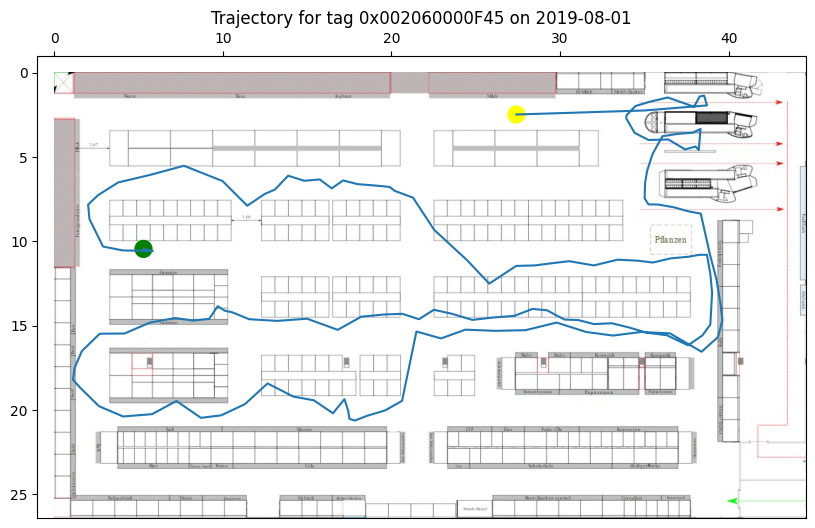

In [15]:
traj_1 = df[df.traj_id == 1 ]
_filter = [0.1, 0.20, 0.4, 0.20, 0.1] #weighted average filter
x = np.convolve(traj_1.x, _filter, mode="same")
y = np.convolve(traj_1.y, _filter, mode="same")
traj_1.x = x;
traj_1.y - y;
getTrajectory(traj_1)

C:\Users\uzair\AppData\Local\Temp\ipykernel_19204\242657164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_1.x = x;


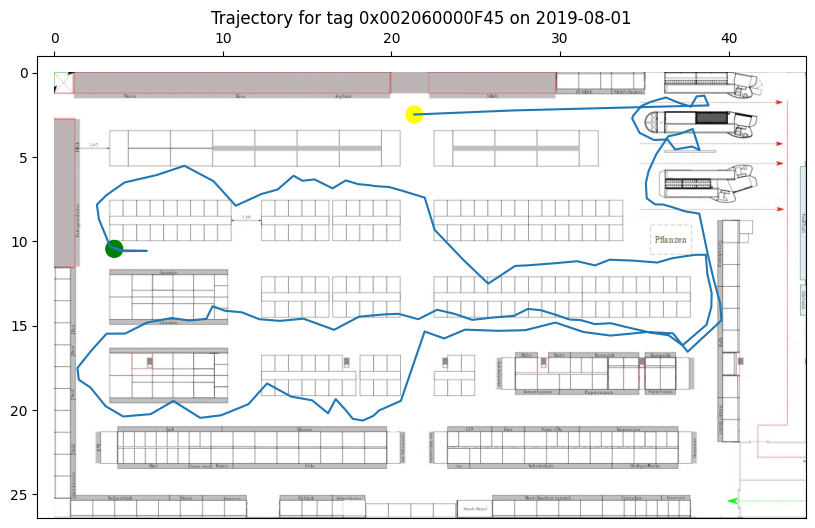

In [16]:
traj_1 = df[df.traj_id == 1 ]
_filter = [0.3, 0.15, 0.1, 0.15, 0.3] #weighted average filter
x = np.convolve(traj_1.x, _filter, mode="same")
y = np.convolve(traj_1.y, _filter, mode="same")
traj_1.x = x;
traj_1.y - y;
getTrajectory(traj_1)

C:\Users\uzair\AppData\Local\Temp\ipykernel_19204\1014679704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_1.x = x;
C:\Users\uzair\AppData\Local\Temp\ipykernel_19204\1014679704.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_1.x = x;


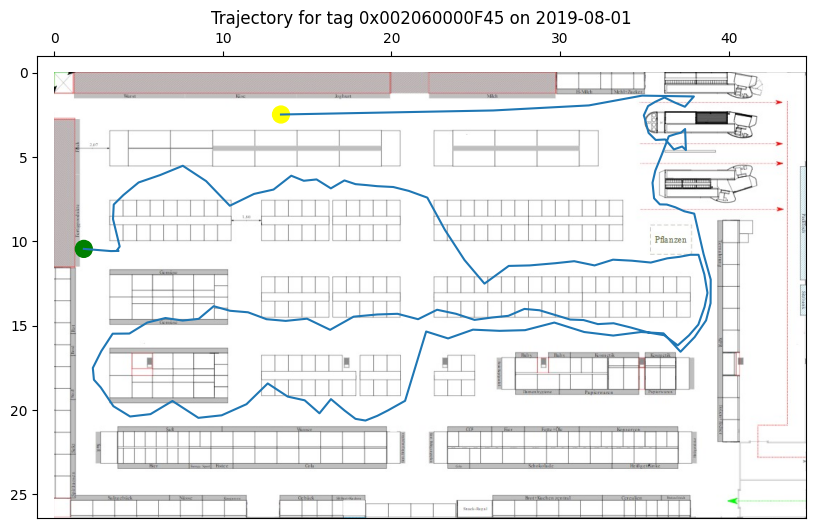

In [17]:
traj_1 = df[df.traj_id == 1 ]
_filter = [0.2,0.15, 0.1, 0.1, 0.1, 0.15,0.2] #weighted average filter
x = np.convolve(traj_1.x, _filter, mode="same")
y = np.convolve(traj_1.y, _filter, mode="same")
traj_1.x = x;
traj_1.y - y;

_filter = [0.45, 0.1, 0.45] #weighted average filter
x = np.convolve(traj_1.x, _filter, mode="same")
y = np.convolve(traj_1.y, _filter, mode="same")
traj_1.x = x;
traj_1.y - y;
getTrajectory(traj_1)

C:\Users\uzair\AppData\Local\Temp\ipykernel_19204\1541298198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_1.x = x;
C:\Users\uzair\AppData\Local\Temp\ipykernel_19204\1541298198.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_1.x = x[::-1];


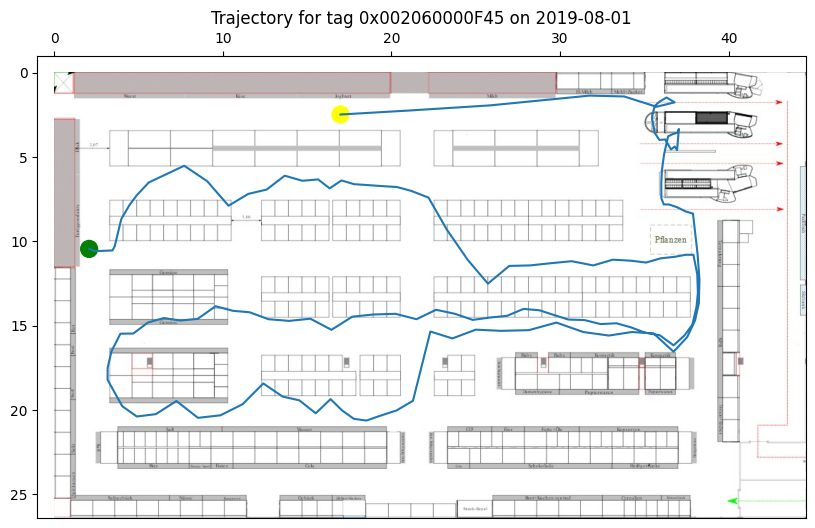

In [18]:
traj_1 = df[df.traj_id == 1 ]
_filter = [0.2,0.15, 0.1, 0.1, 0.1, 0.15,0.2] #weighted average filter
x = np.convolve(traj_1.x, _filter, mode="same")
y = np.convolve(traj_1.y, _filter, mode="same")
traj_1.x = x;
traj_1.y - y;

x = np.convolve(np.array(traj_1.x)[::-1], _filter, mode="same")
y = np.convolve(np.array(traj_1.y)[::-1], _filter, mode="same")
traj_1.x = x[::-1];
traj_1.y - y[::-1];

getTrajectory(traj_1)

In [151]:
df.sort_values(by="time").reset_index()

KeyError: 'time'

In [87]:
df = pd.DataFrame(data=[['red','1','1.5'],['blue','20','2.5'],['red','15','4']],columns=(['color','column1','column2']))
df.head()

,color,column1,column2
0,red,1,1.5
1,blue,20,2.5
2,red,15,4


In [150]:
for key, value in df.groupby('color').groups.items():
    print(df.loc[value].values)

[['blue' '20' '2.5']]
[['red' '1' '1.5']
 ['red' '15' '4']]


In [ ]:
temp = df[:100]

In [85]:
temp.groupby(by=["time"])["tag_id"].groups

{2019-08-01 08:00:00: [0], 2019-08-01 08:00:02: [1], 2019-08-01 08:00:03: [2], 2019-08-01 08:00:05: [3], 2019-08-01 08:00:07: [4], 2019-08-01 08:00:09: [5], 2019-08-01 08:00:10: [6], 2019-08-01 08:00:12: [7], 2019-08-01 08:00:13: [8], 2019-08-01 08:00:15: [9], 2019-08-01 08:00:16: [10], 2019-08-01 08:00:19: [11], 2019-08-01 08:00:21: [12], 2019-08-01 08:00:22: [13], 2019-08-01 08:00:23: [14], 2019-08-01 08:00:24: [15], 2019-08-01 08:00:26: [16], 2019-08-01 08:00:27: [17], 2019-08-01 08:00:28: [18], 2019-08-01 08:00:29: [19], 2019-08-01 08:00:32: [20], 2019-08-01 08:00:33: [21], 2019-08-01 08:00:35: [22], 2019-08-01 08:00:36: [23], 2019-08-01 08:00:37: [24], 2019-08-01 08:00:39: [25], 2019-08-01 08:00:41: [26], 2019-08-01 08:00:45: [27], 2019-08-01 08:00:46: [28], 2019-08-01 08:00:48: [29], 2019-08-01 08:00:50: [30], 2019-08-01 08:00:51: [31], 2019-08-01 08:00:52: [32], 2019-08-01 08:00:54: [33], 2019-08-01 08:00:56: [34], 2019-08-01 08:00:58: [35], 2019-08-01 08:00:59: [36], 2019-08-01

In [74]:
gp[["x","y"]].groups

{2019-08-01 08:00:00: [0], 2019-08-01 08:00:02: [1], 2019-08-01 08:00:03: [2], 2019-08-01 08:00:05: [3], 2019-08-01 08:00:07: [4], 2019-08-01 08:00:09: [5], 2019-08-01 08:00:10: [6], 2019-08-01 08:00:12: [7], 2019-08-01 08:00:13: [8], 2019-08-01 08:00:15: [9], 2019-08-01 08:00:16: [10], 2019-08-01 08:00:19: [11], 2019-08-01 08:00:21: [12], 2019-08-01 08:00:22: [13], 2019-08-01 08:00:23: [14], 2019-08-01 08:00:24: [15], 2019-08-01 08:00:26: [16], 2019-08-01 08:00:27: [17], 2019-08-01 08:00:28: [18], 2019-08-01 08:00:29: [19], 2019-08-01 08:00:32: [20], 2019-08-01 08:00:33: [21], 2019-08-01 08:00:35: [22], 2019-08-01 08:00:36: [23], 2019-08-01 08:00:37: [24], 2019-08-01 08:00:39: [25], 2019-08-01 08:00:41: [26], 2019-08-01 08:00:45: [27], 2019-08-01 08:00:46: [28], 2019-08-01 08:00:48: [29], 2019-08-01 08:00:50: [30], 2019-08-01 08:00:51: [31], 2019-08-01 08:00:52: [32], 2019-08-01 08:00:54: [33], 2019-08-01 08:00:56: [34], 2019-08-01 08:00:58: [35], 2019-08-01 08:00:59: [36], 2019-08-01

In [24]:
from torch.utils.data import Dataset
'''
Process the dataframe to generate the sequences of the pedistrian trajectories

parms:
dataframe -> Dataframe containing trajectories about the the pedistrians
obs_len -> length of the trajectories that needs to be observed for the prediction
pred_len -> length of the trajectories that needs to be predicted
threshold -> threshold for the non linear trajectories
min_ped -> minimum amount of the pedistrian in the trajectory
'''
class IndoorTrajectoryDataset(Dataset):
    def __init__(self, dataframe, obs_len=8, pred_len=12, skip=1, threshold=0.002, min_ped=1):
        dataframe = dataframe.sort_values(by="time")
        seq_len = obs_len + pred_len